In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.options.display.max_rows = None

motor_data = pd.read_csv("measures_v2.csv")

In [8]:
motor_data.tail()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71
1330815,-2.100158,30.721319,45.132307,0.807309,41.734763,0.004395,-2.000792,1.096487,62.131429,38.660370,24.027522,-2.139547e-60,71


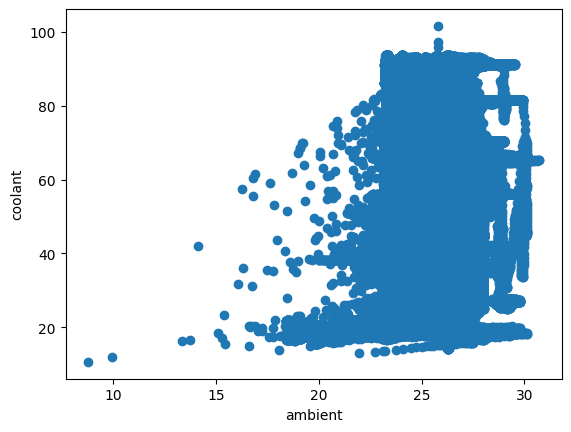

In [4]:
#Q: Does having a coolant motor result in higher rpm?
plt.scatter(motor_data["ambient"], motor_data["coolant"])
plt.xlabel("ambient")
plt.ylabel("coolant")
plt.show()
#A: there seems to be no correlation between the coolant and the rpm

In [14]:
#Q: What is the average coolant temperature?
motor_data["coolant"].mean()
#A: the average tempterature of the coolant is 36

36.22999484011877

In [17]:
motor_data.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')

<AxesSubplot: xlabel='groups', ylabel='count'>

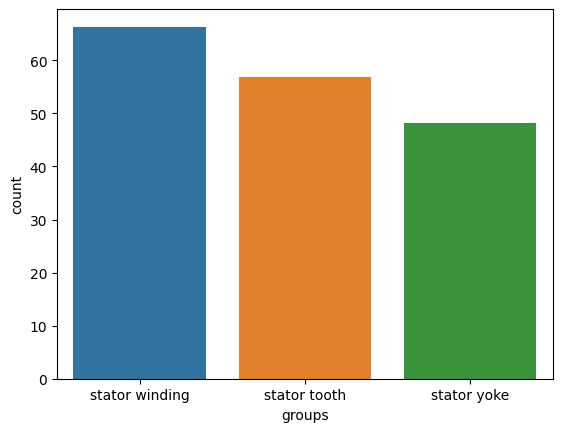

In [21]:
#Which part of the motor on average heats up the most?
#average of each motor part
avg_winding = motor_data["stator_winding"].mean()
avg_tooth = motor_data["stator_tooth"].mean()
avg_yoke = motor_data["stator_yoke"].mean()

x_label = ['stator winding','stator tooth','stator yoke']
averages = [avg_winding, avg_tooth, avg_yoke]

#dict
age_groups = {
    'x_axis': x_label,
    'y_axis': averages
}
vis_df = pd.DataFrame(age_groups)
sns.barplot(data = vis_df, x = 'groups', y = 'count', errorbar = None)

#A: on average, the stator winding heats up the most

In [33]:
#Q: What is the standard deviation of rpm?
motor_data["pm"].std()
#A: The standard deviation of the rpm is 19.

19.001497713975436

In [34]:
#Q: Does one part of the stator heat up more than the other?
df_new = motor_data.iloc[:, [2,4, 9]]
df_new.head(25)
#A: Yes, but only barely - only about 1C. 

,stator_winding,stator_tooth,stator_yoke
0,19.086670,18.293219,18.316547
1,19.092390,18.294807,18.314955
2,19.089380,18.294094,18.326307
3,19.083031,18.292542,18.330833
4,19.082525,18.291428,18.326662
5,19.077108,18.290628,18.323862
6,19.074583,18.292524,18.321936
7,19.082499,18.294041,18.314655
8,19.085533,18.291964,18.306925
9,19.076025,18.287233,18.301733


In [23]:
motor_data.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')

<AxesSubplot: >

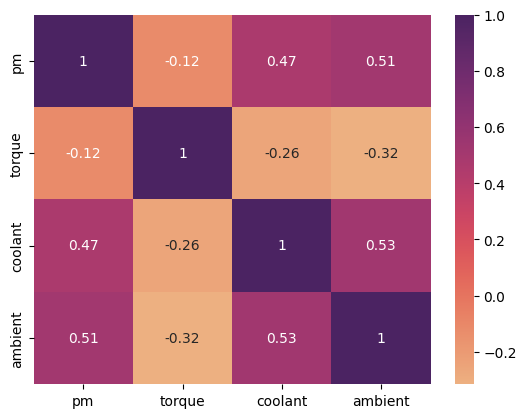

In [31]:
#Does motor speed correlate to higher torque?
motor_features = motor_data[['pm', 'torque', 'coolant', 'ambient']]
corr_heatmap = sns.heatmap(motor_features.corr(), annot = True, cmap = 'flare')
corr_heatmap
#A: No, there seems to be no strong correlation between most of these factors. 

In [32]:
#Do lower temperatures of coolant keep the whole stator cooler?
df_new = motor_data.iloc[:, [1,2,4, 9]]
df_new.head(25)
#A: Yes, the stator parts all seems to stay within the temperature of the coolant temperature. 

,coolant,stator_winding,stator_tooth,stator_yoke
0,18.805172,19.086670,18.293219,18.316547
1,18.818571,19.092390,18.294807,18.314955
2,18.828770,19.089380,18.294094,18.326307
3,18.835567,19.083031,18.292542,18.330833
4,18.857033,19.082525,18.291428,18.326662
5,18.901548,19.077108,18.290628,18.323862
6,18.941711,19.074583,18.292524,18.321936
7,18.960861,19.082499,18.294041,18.314655
8,18.973545,19.085533,18.291964,18.306925
9,18.987812,19.076025,18.287233,18.301733


In [ ]:
#Do coolents consistenly keep the motor at a constant termperature


In [ ]:
#What temperature of coolant is most likely needed to keep the motor working?
